Image alignment
- give two images of the same scene or object, taken from different viewpoints, angles, lighting, or partial occlusion, you want to **transform one image so that its content matches the other.**
- we computer a geometric transformation (rotation, scaling, translation, homography), and warp one image onto the coordinate system of the other
- after the alignment, the objects overlap correctly

Applications
- (satellite image change detection) align images from different dates before comparing them
- (robotics + slam) robots align LiDAR/camera frames to build a consistent map

Method 1 - Feature-based alignment
- use keypoints like ORB/SIFT, match them, esitimate a homography, warp the image

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load images
img1 = cv2.imread("resized/1.jpg", cv2.IMREAD_COLOR)
img2 = cv2.imread("resized/4.jpg", cv2.IMREAD_COLOR)

# convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [32]:
# detect ORB keypoints + descriptors
orb = cv2.ORB_create(5000)
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

In [33]:
print(f"{len(kp1)} keypoints detected for gray1.")
print(f"{len(kp2)} keypoints detected for gray2.")

4848 keypoints detected for gray1.
4820 keypoints detected for gray2.


In [34]:
# match descriptors using brute-force Hamming
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

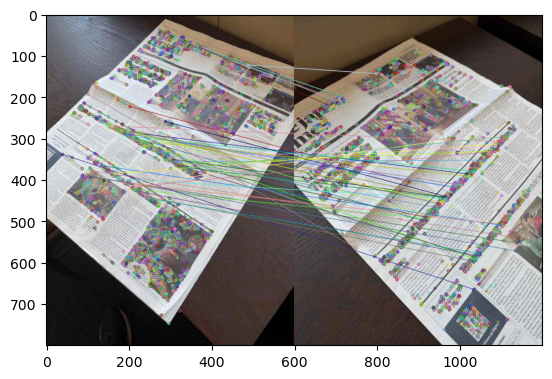

In [39]:
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None)
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.show()


In [35]:
# extract matched keypoint coordinates
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

In [36]:
#compute homography
H, mask = cv2.findHomography(pts2, pts1, cv2.RANSAC)

In [37]:
# warp img2 to align with img1
h, w = img1.shape[:2]
aligned = cv2.warpPerspective(img2, H, (w, h))

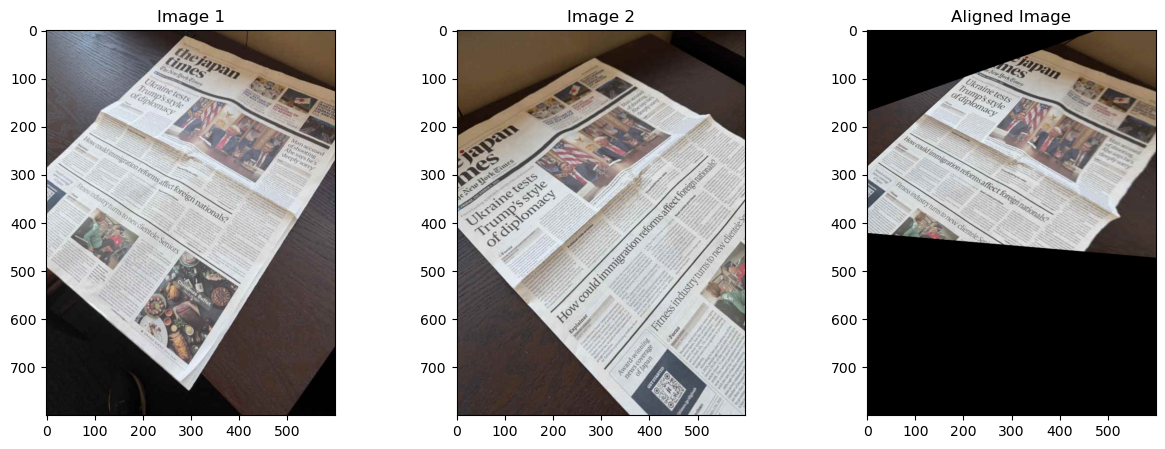

Homography matrix:
[[-1.10427006e-01 -8.30112905e-01  6.60306893e+02]
 [ 5.89535680e-01  5.39207947e-01 -6.48903142e+01]
 [-7.27040211e-04  1.44907386e-03  1.00000000e+00]]


In [38]:
# Visualize
plt.figure(figsize=(15,5))
plt.subplot(131); plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)); plt.title("Image 1")
plt.subplot(132); plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)); plt.title("Image 2")
plt.subplot(133); plt.imshow(cv2.cvtColor(aligned, cv2.COLOR_BGR2RGB)); plt.title("Aligned Image")
plt.show()

print("Homography matrix:")
print(H)